#### Exercício 01 
- Problema de Negócio: Usando dados históricos é possível prever o salário de 
uma pessoa com base no tempo de estudo em horas por mês?

In [2]:
# IMPORTANDO AS BIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Carregar os dados
- Etapa 02

In [7]:
caminho = '../ArquivosAnálise/horasDeEstudo.csv'

dados = pd.read_csv(caminho)

#### Visualizar algumas informações básicas do dataframe
- Etapa 03
- a. Cabeçalho; 
- b. Final do dataframe; 
- c. Tipo de dados;

In [11]:
dados.head(1)

,horas_estudo_mes,salario
0,57.0,6813.0


In [12]:
dados.tail(1)

,horas_estudo_mes,salario
499,29.0,5236.0


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#### Gerar uma análise exploratória dos dados
- Etapa 04 

In [15]:
# Verificar se há dados nulos e mostrar a quantidade;
dados.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [16]:
# Resumo estatístico do dataframe;
dados.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [17]:
# Estudo estatístico das variáveis preditoras (X) >> HORAS ESTUDOS MÊS
dados['horas_estudo_mes'].describe() # Dessa forma esse comando faz uma descrição de uma só coluna
 

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

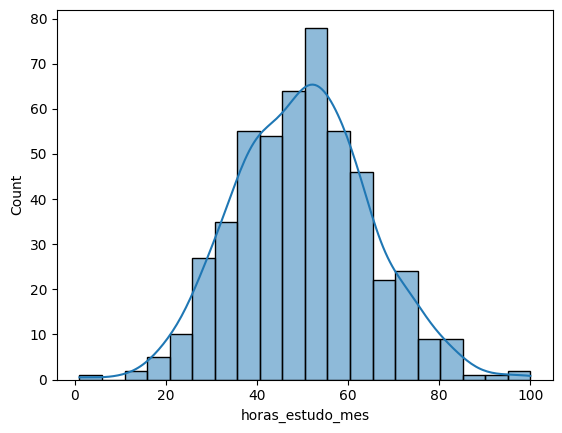

In [18]:
# CRIR UM HISTOGRAMA DA VARIÁVEL PREDITORA
# é usado para analisar a distribuição dos dados
sns.histplot(
    data = dados, # TABELA QUE CONTÉM A INFORMAÇÃO
    x = 'horas_estudo_mes',
    kde= True # CURVA DE DISTRIBUIÇÃO NORMAL
)


In [21]:
# Analisar a correlação entre as variáveis;
dados.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [23]:
# SEPARAR AS VARIÁVEIS
x = dados['horas_estudo_mes']
y = dados['salario']

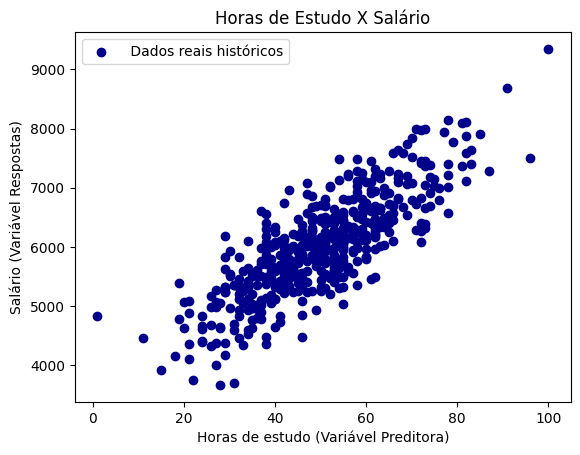

In [25]:
# CRIAR UM GRÁFICO DE DISPERSÃO
plt.scatter(x, y, color = 'darkblue', label = ' Dados reais históricos')
plt.title('Horas de Estudo X Salário')
plt.ylabel('Salário (Variável Respostas)')
plt.xlabel('Horas de estudo (Variável Preditora)')
plt.legend()

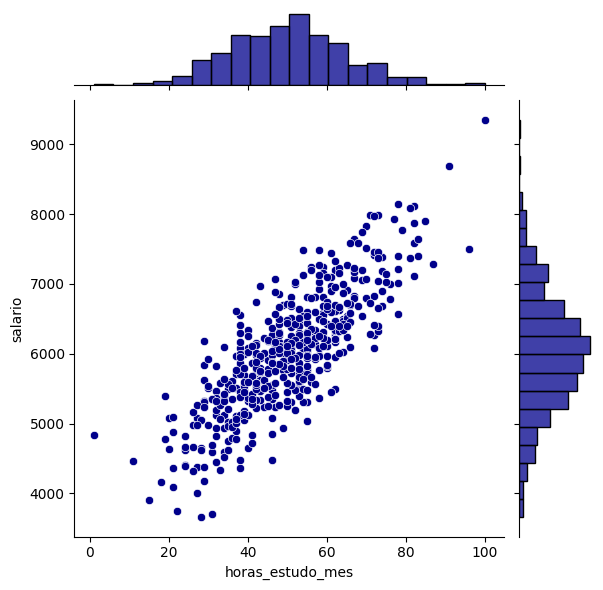

In [27]:
# Crie os gráficos de dispersão, jointplot e pairplot para demonstrar a correlação entre as variáveis;
sns.jointplot(data= dados, x= 'horas_estudo_mes', y= 'salario', color='darkblue')

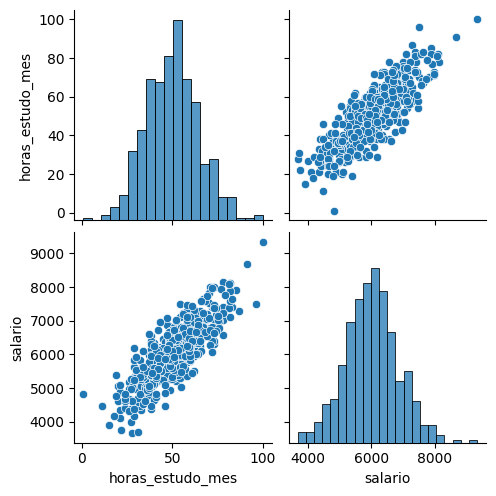

In [30]:
sns.pairplot(dados)

#### Preparação dos dados
- Etapa 05

In [35]:
# CONVERTER A COLUNA HORAS_ESTUDO_MES PARA ARRAY
x = np.array(dados['horas_estudo_mes'])

# AJUSTAR O SHAPE DA VARIÁVEL (X)
x = x.reshape(-1,1)

In [36]:
#### PREPARAR A VARIÁVEL RESPOSTA (Y)
y = dados['salario']

#### Separação dos dados em treino e teste
- Etapa 06

In [39]:
# DIVIDIR AS VARIÁVEIS EM TREINO E TESTE(TAMANHO DO TESTE = 20%)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=42)

In [46]:
print('Quantidade de dados do dataframe:', len(x))
print('Quantidade de dados de teste: ', len(xtest))
print('Quantidade de dados para treino: ', len(xtrain))

Quantidade de dados do dataframe: 500
Quantidade de dados de teste:  100
Quantidade de dados para treino:  400


#### Treinamento do modelo
- Etapa 07

In [44]:
modelo = LinearRegression(fit_intercept=True)

modelo.fit(xtrain,ytrain)

LinearRegression()

In [47]:
print('Coeficiente angular (a): ', modelo.coef_)
print('Coeficiente linear(b): ', modelo.intercept_)

Coeficiente angular (a):  [48.18185277]
Coeficiente linear(b):  3596.783724372753


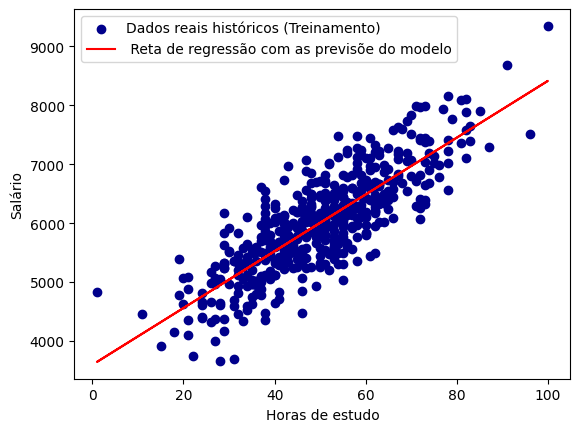

In [48]:
# VISUALIZAR A RETA DE REGRESSÃO LINEAR (PREVISÕES)
# E OS DADOS REAIS

plt.scatter(x,y, color ='darkblue', label = 'Dados reais históricos (Treinamento)')

plt.plot(x, modelo.predict(x), color = 'red', label =' Reta de regressão com as previsõe do modelo')

plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()

#### Deploy do modelo
- Etapa 08
- Deploy significa, colocar o modelo em produção, ou sseja, colocá-lo para rodar com dados reais.

In [66]:
horasEstudoNovo = np.array([[50]])

salarioPrevisto = modelo.predict(horasEstudoNovo)

print(f'Para {horasEstudoNovo[0][0]} horas dedicadas,' + f'provavelmente você terá um salário de R$ {round(salarioPrevisto[0],2)}')

horasEstudoNovo = np.array([[48]])

salarioPrevisto = modelo.predict(horasEstudoNovo)
print(f'Para {horasEstudoNovo[0][0]} horas dedicadas,' + f'provavelmente você terá um salário de R$ {round(salarioPrevisto[0],2)}')

horasEstudoNovo = np.array([[65]])

salarioPrevisto = modelo.predict(horasEstudoNovo)
print(f'Para {horasEstudoNovo[0][0]} horas dedicadas,' + f'provavelmente você terá um salário de R$ {round(salarioPrevisto[0],2)}')

horasEstudoNovo = np.array([[73]])

salarioPrevisto = modelo.predict(horasEstudoNovo)

print(f'Para {horasEstudoNovo[0][0]} horas dedicadas,' + f'provavelmente você terá um salário de R$ {round(salarioPrevisto[0],2)}')


Para 50 horas dedicadas,provavelmente você terá um salário de R$ 6005.88
Para 48 horas dedicadas,provavelmente você terá um salário de R$ 5909.51
Para 65 horas dedicadas,provavelmente você terá um salário de R$ 6728.6
Para 73 horas dedicadas,provavelmente você terá um salário de R$ 7114.06


In [67]:
horas = int(input('Digite a hora pretendida de salário: '))

horasEstudoNovo = np.array([[horas]])

salarioPrevisto = modelo.predict(horasEstudoNovo)
print(f'Para {horasEstudoNovo[0][0]} horas dedicadas,' + f'provavelmente você terá um salário de R$ {round(salarioPrevisto[0],2)} ')

Para 50 horas dedicadas,provavelmente você terá um salário de R$ 6005.88 
